<a href="https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #08





In this assignment, I used Explainable AI (XAI) with saliency scores to explore how symbols, patterns, and text within a prompt impact a language model’s response. By examining the importance of each component through gradient-based scores, I identified which parts of the prompt most shape the model’s interpretation. This approach highlights how prompt structure influences outcomes, offering insights into effective prompt design. For the assignment, I used ChatGPT as guidance.

Shunxin Zhang

Notebook:https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment08.ipynb [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/zsx711/AIPI-590/blob/main/notebook/AIPI_590_Assignment08.ipynb)

In [6]:
!pip install transformers torch

In [7]:
import os
import torch
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import matplotlib.pyplot as plt

In [12]:
# Check if the repository already exists, and remove it if so
repo_name = "AIPI-590"
if os.path.exists(repo_name):
    !rm -rf {repo_name}  # Remove the existing directory

# Clone GitHub repository (AIPI-590)
repo_name = "AIPI-590"
git_path = 'https://github.com/zsx711/AIPI-590.git'
!git clone "{git_path}"

# Change the working directory to 'notebook' inside your repo
notebook_dir = 'notebook'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"

Cloning into 'AIPI-590'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (111/111), done.
remote: Total 146 (delta 45), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (146/146), 3.45 MiB | 11.22 MiB/s, done.
Resolving deltas: 100% (45/45), done.
/content/AIPI-590/notebook


In [8]:
# Load pre-trained model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()  # Set the model to evaluation mode

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


GPT2LMHeadModel(
  (transformer): GPT2Model(
    (wte): Embedding(50257, 768)
    (wpe): Embedding(1024, 768)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-11): 12 x GPT2Block(
        (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2SdpaAttention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=768, out_features=50257, bias=False)
)

In [9]:
prompts = [
    "Is honesty *always* the best policy?",               # Symbols
    "Steps to happiness: (1) be grateful, (2) embrace growth, (3) connect with others.",  # Patterns
    "Can forgiveness heal even the deepest wounds?"       # Text-Heavy
]

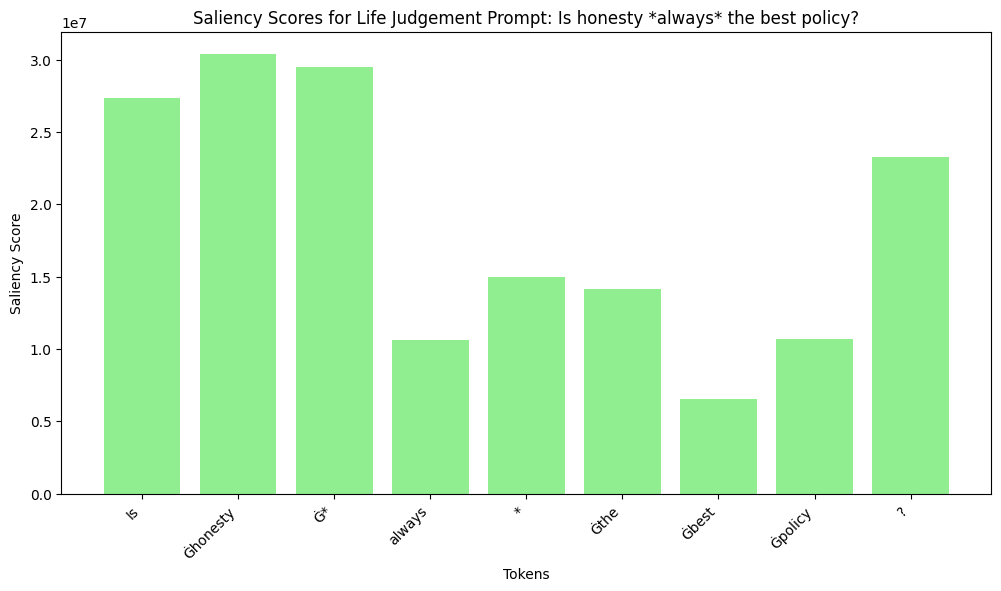

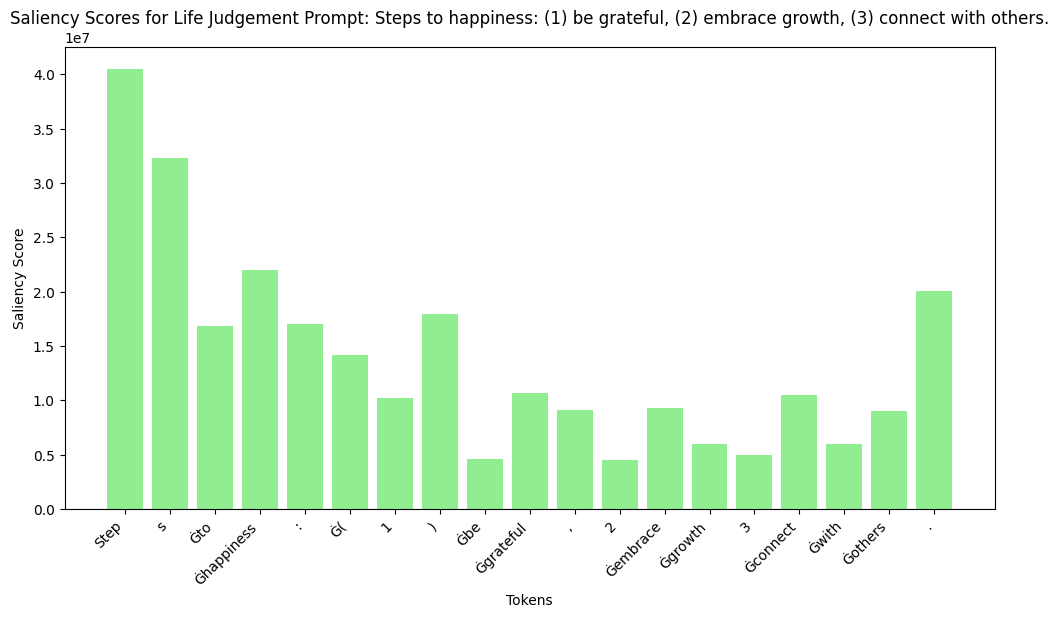

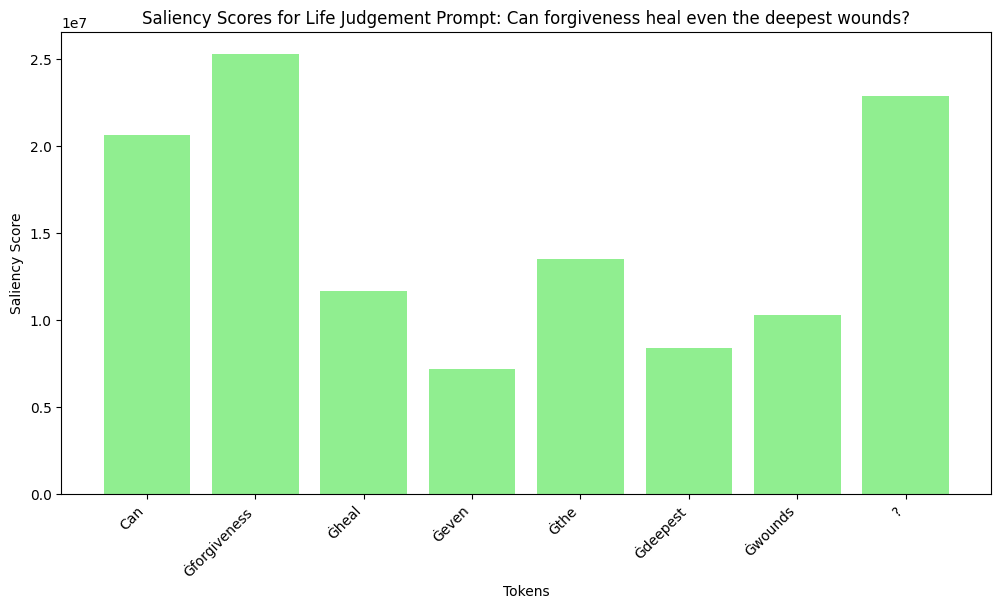

In [11]:
# Function to calculate saliency scores for each prompt
def calculate_saliency_scores(prompt):
    # Tokenize and get embeddings
    inputs = tokenizer(prompt, return_tensors="pt")
    embeddings = model.transformer.wte(inputs["input_ids"])
    embeddings.retain_grad()  # Enable gradient calculation on embeddings

    # Forward pass and calculate gradients
    outputs = model(inputs_embeds=embeddings)
    loss = outputs.logits[0, -1].sum()  # Sum the logits of the last token
    loss.backward()  # Backpropagate to calculate gradients

    # Saliency as the norm of gradients
    saliency = embeddings.grad.abs().sum(dim=-1).squeeze().detach()

    return saliency, tokenizer.tokenize(prompt)

# Plotting saliency scores for each prompt
for prompt in prompts:
    saliency, tokens = calculate_saliency_scores(prompt)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.bar(tokens, saliency, color='lightgreen')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Tokens")
    plt.ylabel("Saliency Score")
    plt.title(f"Saliency Scores for Life Judgement Prompt: {prompt}")
    plt.show()

# Summary of findings
The saliency score analysis reveals that symbols, structured patterns, and emotionally charged words each significantly shape a language model’s interpretation in life judgment prompts. Symbols like * around words like "always" emphasize certainty, drawing the model's focus to specific ideas. Structured lists (e.g., "Steps to happiness...") direct the model's attention to each step, improving the clarity of instructional prompts and highlighting key actions. Emotionally charged words (e.g., "forgiveness" and "wounds") attract strong attention, indicating the model’s sensitivity to profound, human-centered concepts. These findings underscore how strategic use of symbols, patterns, and evocative language can enhance prompt effectiveness, guiding the model’s responses in more meaningful ways.